<a href="https://colab.research.google.com/github/DensMathew/DensMathew/blob/main/Credit%20Card%20Client%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def load_and_preprocess_data(file_path='/german_credit_data.csv'):
    df = pd.read_csv(file_path)
    df = df.replace('nan', np.nan)
    return df

import pandas as pd
import numpy as np

In [43]:
df = load_and_preprocess_data()
le = LabelEncoder()
caterogical_columns = df.select_dtypes(include=['object']).columns
for col in caterogical_columns:
    df[col] = le.fit_transform(df[col])
    x = df.drop('Risk', axis = 1)
    y = df['Risk']

In [ ]:
def create_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [37]:
def train_evaluvate_model(x, y):

  le = LabelEncoder()
  categorical_columns = x.select_dtypes(include=['object']).columns
  for col in categorical_columns:
      x[col] = le.fit_transform(x[col])

  y = le.fit_transform(y)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  scaler = StandardScaler()
  x_train_scaled = scaler.fit_transform(x_train)
  x_test_scaled = scaler.transform(x_test)

  model = create_model(x_train_scaled.shape[1])
  early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

  history = model.fit(x_train_scaled, y_train,
                      epochs=100,
                      batch_size=32,
                      validation_split=0.2,
                      callbacks=[early_stopping],
                      verbose=1)
  test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
  print(f"\nTest Accuracy: {test_accuracy:.4f}")

  return model, history, scaler

In [38]:
def plot_training_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

  ax1.plot(history.history['accuracy'])
  ax1.plot(history.history['val_accuracy'])
  ax1.set_title('Model Accuracy')
  ax1.set_ylabel('Accuracy')
  ax1.set_xlabel('Epoch')
  ax1.legend(['Train', 'Validation'])

  ax2.plot(history.history['loss'])
  ax2.plot(history.history['val_loss'])
  ax2.set_title('Model Loss')
  ax2.set_ylabel('Loss')
  ax2.set_xlabel('Epoch')
  ax2.legend(['Train', 'Validation'])

  plt.tight_layout()
  plt.show()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5538 - loss: 0.6844 - val_accuracy: 0.7000 - val_loss: 0.6236
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6973 - loss: 0.6216 - val_accuracy: 0.7000 - val_loss: 0.5831
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7236 - loss: 0.5794 - val_accuracy: 0.7000 - val_loss: 0.5511
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7298 - loss: 0.5712 - val_accuracy: 0.7063 - val_loss: 0.5304
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7178 - loss: 0.5705 - val_accuracy: 0.7437 - val_loss: 0.5170
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7056 - loss: 0.5497 - val_accuracy: 0.7312 - val_loss: 0.5090
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7287 - loss: 0.5467 - val_accuracy: 0.7312 - val_loss: 0.5038
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7379 - loss: 0.5106 - val_accuracy: 0.7375 - val_loss: 0.

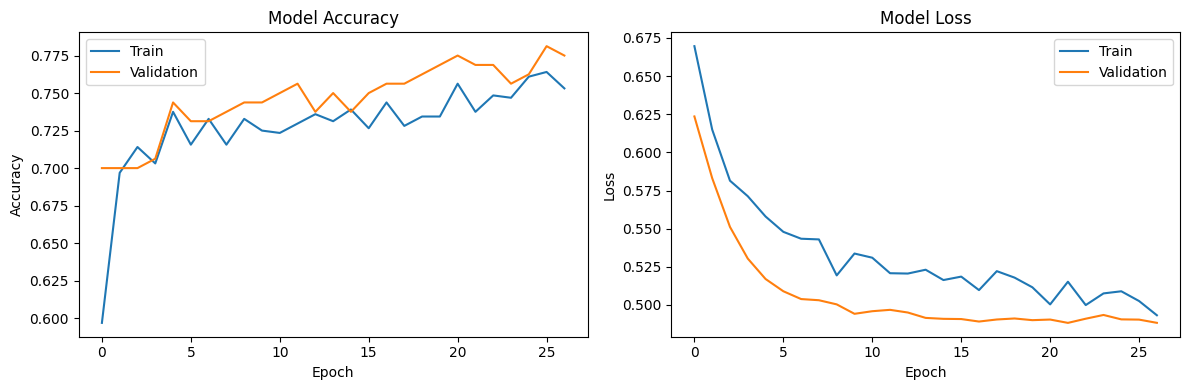

In [44]:
if __name__ == "__main__":
  df = load_and_preprocess_data()
  x = df.drop('Risk', axis=1)
  y = df['Risk']
  model, history, scaler = train_evaluvate_model(x, y)
  plot_training_history(history)
  model.save('german_credit_model.h5')